In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from textblob import TextBlob

In [2]:
data= pd.read_csv("twitter_data.csv",encoding="latin-1")

In [23]:
#data

In [24]:
def cleandata(text):
    text = re.sub(r'@[A-Za-z^A-Z0-9]+', '', text) #Removes @mentions
    text = re.sub(r'#', '', text) #Removing #
    text = re.sub(r'RT[\s]+', '', text) #Removing RT
    text = re.sub(r'https?:\/\/\S+', '', text) #Removing hyperlink
    text = re.sub(r'[°ÂŸÃ˜,¼¢¤©:½;~+=¯¶¹.?¸!@#$%^&¦*]', '', text)
   # text = re.sub(r'', '', text)
    
    return text

data['tweets'] = data['tweets'].apply(cleandata)

#data

In [25]:
#data.head(30000)

In [6]:
def getSubject(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

data['Subjectivity'] = data['tweets'].apply(getSubject)
data['Polarity'] = data['tweets'].apply(getPolarity)

In [26]:
#data

In [8]:
d ={"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have","gr8": "great"}

words = "I luv kashmir"
words = words.split()
reformed = [d[word] if word in d else word for word in words]
reformed = " ".join(reformed)

In [27]:
#data.head(10)

In [11]:
#removing slang words
data['tweets'] = data['tweets'].apply(lambda x : ' '.join(d[word] if word in d else word for word in x.split()))

In [28]:
#data.head(1000)

In [13]:
from wordcloud import WordCloud

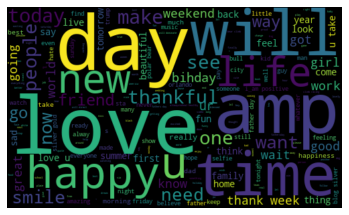

In [14]:
allWords = ''.join([twts for twts in data['tweets']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [15]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
data['Analysis'] = data['Polarity'].apply(getAnalysis)
dff = data.head(1000)

In [16]:
j = 1
Sorted_tweets = dff.sort_values(by=['Polarity'])
for i in range(0, Sorted_tweets.shape[0]):
    if(Sorted_tweets['Analysis'][i] == 'Positive'):
        print(str(j)+ ') '+Sorted_tweets['tweets'][i])
        print()
        j +=1

1) thanks for lyft credit i cannot use cause they do not offer wheelchair vans in pdx disapointed getthanked

2) model i love u take with u all the time in ur±  

3) [2/2] huge fan fare and big talking before they leave chaos and pay disputes when they get there allshowandnogo

4) we won love the land allin cavs champions cleveland clevelandcavaliers 

5) welcome here i am it is so great

6) i am thankful for having a paner thankful positive

7) euro2016 people blaming ha for conceded goal was it fat rooney who gave away free kick knowing bale can hit them from there

8) product of the day happy man wine tool who is it is the weekend time to open up amp drink up

9) beautiful sign by vendor 80 for 4500 upsideofflorida shopalyssas love

10) all smiles when media is  pressconference in antalya turkey sunday throwback love 

11) we had a great panel on the mediatization of the public service ica16

12) happy father's day 

13) 50 people went t

In [17]:
j = 1
Sorted_tweets = dff.sort_values(by=['Polarity'])
for i in range(0, Sorted_tweets.shape[0]):
    if(Sorted_tweets['Analysis'][i] == 'Negative'):
        print(str(j)+ ') '+Sorted_tweets['tweets'][i])
        print()
        j +=1

1) when a father is dysfunctional and is so selfish he drags his kids into his dysfunction run

2) the next school year is the year for exams cannot think about that ­ school exams hate imagine actorslife revolutionschool girl

3)  ireland consumer price index (mom) climbed from previous 02 to 05 in may blog silver gold forex

4) we are so selfish orlando standwithorlando pulseshooting orlandoshooting biggerproblems selfish heabreaking values love

5) sad little dude badday coneofshame cats pissed funny laughs

6) it was a hard monday due to cloudy weather disabling oxygen production for today goodnight badmonday

7) it is unbelievable that in the 21st century we would need something like this again neverump xenophobia

8) yup being a knicks fan is hard so its easier to just be an nba fan when the playoffs roll around 

9) whenever im and something goes wrong |

10) carrying a gun would not of helped if you cannot take it in with you gun control will not stop the black market 

In [18]:
j = 1
Sorted_tweets = dff.sort_values(by=['Polarity'])
for i in range(0, Sorted_tweets.shape[0]):
    if(Sorted_tweets['Analysis'][i] == 'Neutral'):
        print(str(j)+ ') '+Sorted_tweets['tweets'][i])
        print()
        j +=1

1) bihday your majesty

2) factsguide society now motivation

3) camping tomorrow danny

4) i get to see my daddy today 80days gettingfed

5) cnn calls michigan middle school 'build the wall' chant '' tcot

6) no comment in australia opkillingbay seashepherd helpcovedolphins thecove helpcovedolphins

7) ouchjunior is angrygot7 junior yugyoem omg

8) retweet if you agree

9) its friday  smiles all around via ig user cookies make people

10) as we all know essential oils are not made of chemicals

11) lumpy says i am a prove it lumpy

12) tgif ff to my gamedev indiedev indiegamedev squad

13) alohafriday time does not exist positivevibes hawaiian

14) rip to the fellow nohern ireland fan who sadley passed away tonight gawa forever singing and cheering on fire

15) morning travelingram dalat ripinkylife

16) oh cedarpoint waited 2 hours in the valravn line and it stopped working we were so close

17) when you finally finish a book you have been working on for awhile bookworm ontoth

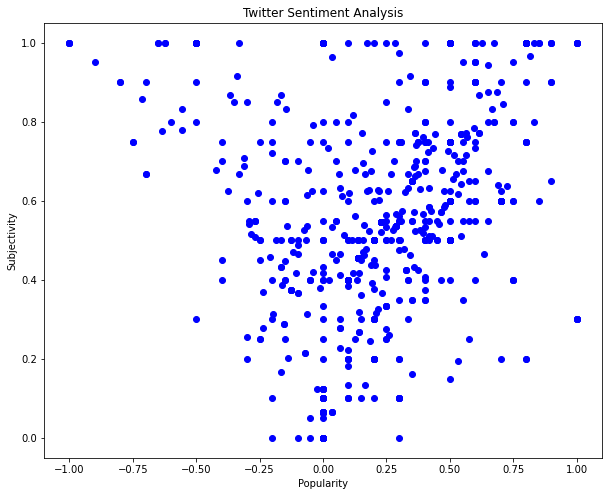

In [22]:
plt.figure(figsize=(10,8))
for i in range(0, dff.shape[0]):
    plt.scatter(dff['Polarity'][i],dff['Subjectivity'][i], color = 'Blue')
    
plt.title('Twitter Sentiment Analysis')
plt.xlabel('Popularity')
plt.ylabel('Subjectivity')
plt.show()